# INFO 3402 – Class 31: Database exercises

[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT)  

In [1]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = 100

from datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

Create the conenction to the database.

In [73]:
from sqlalchemy import create_engine


host = 'info3402-f19-boulderproperty.cjuyvrfem14z.us-west-2.rds.amazonaws.com'
user = 'queryuser'
port = 3306
password = 'queriesfromboulder'
database = 'innodb'

# dialect[+driver]://user:password@host/dbname[?key=value..]
engine = create_engine('mysql+pymysql://{0}:{1}@{2}:{3}/{4}'.format(user,password,host,port,database),
                       pool_size=10,
                       max_overflow=20,
                       connect_args={'connect_timeout': 10000})
conn = engine.connect()

## Exploratory queries

Show what each of the tables contain. You will almost certainly want to heed the advise given on the [Boulder County Assessor's Office](https://www.bouldercounty.org/property-and-land/assessor/data-download/) website as well as review the [documentation PDF](https://assets.bouldercounty.org/wp-content/uploads/2017/02/ar-property-data-download-help.pdf).


In [74]:
pd.read_sql_query('show tables',conn)

,Tables_in_innodb
0,Account_Parcels
1,Assessment
2,Assessments
3,Buildings
4,Business_Personal_Property
5,Land
6,Owner_Address
7,Permits
8,Sales
9,Tax_Areas


In [3]:
q = """
SELECT
    *
FROM
    Assessments
LIMIT
    2
"""

pd.read_sql_query(q,conn)

,strap,tax_yr,bldAcutalVal,LandAcutalVal,xfActualVal,totalActualVal,landAssessedVal,bldAssessedVal,xfAssessedVal,totalAssessedVal,status_cd
0,M2000001,2019,77100,0,None,77100,None,5513.0,None,5513,A
1,M2000002,2019,46700,0,None,46700,None,3339.0,None,3339,A


In [63]:
q = """
SELECT
    *
FROM
    Buildings
LIMIT
    2
"""

pd.read_sql_query(q,conn)

,strap,bld_num,section_num,designCode,designCodeDscr,qualityCode,qualityCodeDscr,bldgClass,bldgClassDscr,ConstCode,ConstCodeDscr,builtYear,CompCode,EffectiveYear,bsmtSF,bsmtType,bsmtTypeDscr,carStorageSF,carStorageType,carStorageTypeDscr,nbrBedRoom,nbrRoomsNobath,mainfloorSF,nbrThreeQtrBaths,nbrFullBaths,nbrHalfBaths,TotalFinishedSF,Ac,AcDscr,Heating,HeatingDscr,ExtWallPrim,ExtWallDscrPrim,ExtWallSec,ExtWallDscrSec,IntWall,IntWallDscr,Roof_Cover,Roof_CoverDscr,Stories,UnitCount,status_cd
0,M2000001,1,1,0320,DOUBLE WIDE,30,AVERAGE,1235,MANUFACTURED HOUSING IMPROVEMENTS,0,None,1999,1.0,1999,0,0,0,560,GRC,CARPORT AREA,0.0,0.0,1680,0.0,0.0,0.0,1680,None,None,None,None,None,None,None,None,None,None,None,None,None,None,A
1,M2000002,1,1,0310,SINGLE WIDE,30,AVERAGE,1235,MANUFACTURED HOUSING IMPROVEMENTS,0,None,1998,1.0,1998,0,0,0,0,0,0,0.0,0.0,1216,0.0,0.0,0.0,1216,None,None,None,None,None,None,None,None,None,None,None,None,None,None,A


In [5]:
q = """
SELECT
    *
FROM
    Land
LIMIT
    2
"""

pd.read_sql_query(q,conn)

,strap,landUnitValue,landUnitType,landClass,landClassDscr,GIS_sqft,GIS_acreage,status_cd
0,R0000002,1.0,UT,1230.0,CONDO LAND NEW METHOD,0,0.0,A
1,R0000003,1.0,UT,1230.0,CONDO LAND NEW METHOD,0,0.0,A


In [6]:
q = """
SELECT
    *
FROM
    Owner_Address
LIMIT
    2
"""

pd.read_sql_query(q,conn)

,CreatedDate,strap,folio,status_cd,bld_num,str_num,str,str_pfx,str_sfx,str_unit,city,sub_code,sub_dscr,section,township,range,block,lot,owner_name,mail_to,mailingAddr1,mailingAddr2,mailingCity,mailingState,mailingZip,mailingCountry,role_cd,pct_own,taxArea,nh,mill_levy,legalDscr,waterFee,account_type
0,11/3/2019 4:01:09 AM,M2000001,146318113001,A,0.0,4500.0,19TH,None,ST,119,BOULDER,1841.0,COUNTRYSIDE VILLAGE BOULDER - MHP BOV,18.0,1N,70.0,,,BRETADO-SEGOVIA NORATO SERGIO,None,4500 19TH ST #119,None,BOULDER,CO,80304,None,P,1.0,10,122.0,86.7,119 COUNTRYSIDE VILLAGE BO MHP 99 LEX 60X28 2T...,None,MANUFACTURED HOME
1,11/3/2019 4:01:09 AM,M2000002,146318113001,A,0.0,4500.0,19TH,None,ST,113,BOULDER,1841.0,COUNTRYSIDE VILLAGE BOULDER - MHP BOV,18.0,1N,70.0,,,LASTIRI BENJAMIN,None,4500 19TH ST 113,None,BOULDER,CO,80304,None,P,1.0,10,122.0,86.7,113 COUNTRYSIDE VILLAGE BO MHP 98 PRE 76X16 GD...,None,MANUFACTURED HOME


In [7]:
q = """
SELECT
    *
FROM
    Permits
LIMIT
    2
"""

pd.read_sql_query(q,conn)

,strap,issued_by,permit_num,permit_category,issue_dt,estimated_value,description
0,M2000001,LONGMONT,200500119,OTHER,1/14/2005 12:00:00 AM,1200.0,None
1,M2000001,LONGMONT,2402,OTHER,7/1/2004 12:00:00 AM,400.0,None


In [8]:
q = """
SELECT
    *
FROM
    Sales
LIMIT
    2
"""

pd.read_sql_query(q,conn)

,strap,deedNum,Tdate,sales_cd,deed_type,price,status_cd
0,M2000001,7P193092,9/13/1999 12:00:00 AM,Q,TN,66000.0,A
1,M2000001,7P544958,9/13/1999 12:00:00 AM,P,NC,0.0,A


## Exercise 1

A "strap" ID is used to identify a single piece of property, but that property can have multiple buildings.

Using the Buildings table, return an ordered list of which straps have the most buildings. You will need to use GROUP BY and ORDER BY clauses.

In [79]:
q = """
SELECT
    strap, count(strap) as count
FROM 
    Buildings
GROUP BY
    strap
ORDER BY
    count DESC
LIMIT
    5
"""

pd.read_sql_query(q,conn)

,strap,count
0,R0085173,91
1,R0606029,72
2,R0031802,55
3,R0607566,53
4,R0604703,48


In [78]:
q = """
SELECT
    *
FROM
    Owner_Address
WHERE
    strap = 'R0606029'
"""

pd.read_sql_query(q,conn)

,CreatedDate,strap,folio,status_cd,bld_num,str_num,str,str_pfx,str_sfx,str_unit,city,sub_code,sub_dscr,section,township,range,block,lot,owner_name,mail_to,mailingAddr1,mailingAddr2,mailingCity,mailingState,mailingZip,mailingCountry,role_cd,pct_own,taxArea,nh,mill_levy,legalDscr,waterFee,account_type
0,11/3/2019 4:01:09 AM,R0606029,131511309001,A,0.0,766.0,MARTIN,S,ST,None,LONGMONT,3255.0,HARVEST JUNCTION VILLAGE,11.0,2N,69.0,14,1,WATERMARK AT LONGMONT CO LLC,None,901 WABASH AVE STE 300,None,TERRE HAUTE,IN,47807,None,P,1.0,683,211.0,111.234,LOT 1 BLK 14 HARVEST JUNCTION VILLAGE,None,APARTMENT


## Exercise 2

The "designCodeDscr" in the Buildings table is a classification of the kind of building.

Using the Buildings table, return an ordered list of the average "builtYear" for each kind of "designCodeDscr". You will need to use GROUP BY and ORDER BY clauses.

In [80]:
q = """
SELECT
    designCodeDscr, count(designCodeDscr) as count, avg(builtYear) as mean_year, avg(TotalFinishedSF) as avg_sqft
FROM
    Buildings
GROUP BY
    designCodeDscr
ORDER BY
    mean_year DESC
LIMIT
    20
"""

pd.read_sql_query(q,conn)

,designCodeDscr,count,mean_year
0,FARM SUN SHADE SHELTER,2,2016.0000
1,SKATING RINK (ICE),1,2015.0000
2,ESTATE STABLE,3,2010.3333
3,TRIPLE WIDE,2,2008.5000
4,RELOCATABLE OFFICE,2,2008.5000
5,COMPUTER CENTER,1,2007.0000
6,HOSPITAL,6,2006.5000
7,PAIRED HOMES,800,2004.5738
8,REGIONAL SHOPPING CENTER,6,2003.1667
9,REGIONAL DISCOUNT SHOPPING CENTER,1,2000.0000


Write a follow-up query that only has the average year in which "SUPERMARKET"s are built.

In [85]:
q = """
SELECT
    designCodeDscr, count(designCodeDscr) as count, avg(builtYear) as mean_year, avg(TotalFinishedSF) as avg_sqft
FROM
    Buildings
WHERE
    designCodeDscr = 'SUPERMARKET'
GROUP BY
    designCodeDscr
"""

pd.read_sql_query(q,conn)

,designCodeDscr,count,mean_year,avg_sqft
0,SUPERMARKET,36,1987.3056,43093.9167


In [83]:
q = """
SELECT
    designCodeDscr, count(designCodeDscr) as count, avg(builtYear) as mean_year
FROM
    Buildings
GROUP BY
    designCodeDscr
HAVING
    designCodeDscr = 'SUPERMARKET'
ORDER BY
    mean_year DESC
LIMIT
    20
"""

pd.read_sql_query(q,conn)

,designCodeDscr,count,mean_year
0,SUPERMARKET,36,1987.3056


## Exercise 3

How do land assessments vary with area?

Join the Assessments and Land tables on their strap IDs and save the result as `assessment_land_df`.

In [88]:
q = """
SELECT
    *
FROM
    Assessments
INNER JOIN
    Land
    ON
    Assessments.strap = Land.strap
LIMIT
    100
"""

assessment_land_df = pd.read_sql_query(q,conn)

Using `assessment_land_df`, make a scatterplot with "GIS_sqft" on the x-axis and "LandActualValue" on the y-axis.

(100000.0, 10000000.0)

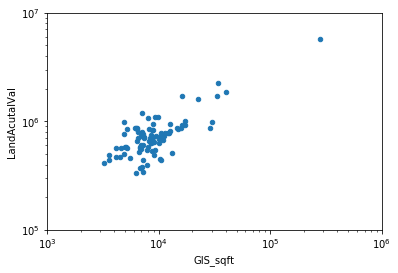

In [93]:
ax = assessment_land_df.plot.scatter(x='GIS_sqft',y='LandAcutalVal')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim((1e3,1e6))
ax.set_ylim((1e5,1e7))

## Exercise 4

Who in D.C. owns so much property in Boulder?

Group the Owner_Address table by "owner_name", count the owner_name column, and filter to only DC.

In [ ]:
q = """

"""

pd.read_sql_query(q,conn)

## Exercise 5

Do an INNER JOIN the Land and Assessments tables and ORDER BY "totalActualVal". What is the "GIS_sqft" of the most valuable property?

In [ ]:
q = """

"""

pd.read_sql_query(q,conn)

## Exercise 6

Do out-of-state owners own more valuable property than in-state owners?

Join the Owner_Address and Assessments tables, GROUP BY Owner_Address's "mailingState", and aggregate using the average "totalActualVal" from Assessments.

In [ ]:
q = """

"""

pd.read_sql_query(q,conn)

## Exercise 7

How do building assessments vary with square-footage? We didn't really talk about [sub-queries](https://dev.mysql.com/doc/refman/8.0/en/subqueries.html) ([tutorial](http://www.mysqltutorial.org/mysql-subquery/)), but you can write [queries within queries](https://knowyourmeme.com/memes/xzibit-yo-dawg).

Group the Buildings by strap, aggregate by summing "TotalFinishedSF", and join the results with the Assessments table on "strap" ID. Save the results as `footage_assessments_df`.

This is a very expensive operation, so it may take minutes on our baby free-tier cloud server.

In [66]:
q = """
SELECT 
    *
FROM
    Assessments
INNER JOIN
    (SELECT
        strap, sum(TotalFinishedSF)
    FROM
        Buildings
    GROUP BY
        strap
    ) as bldg
    ON
        bldg.strap = Assessments.strap
"""

footage_assessments_df = pd.read_sql_query(q,conn)

In [67]:
footage_assessments_df.head()

,strap,tax_yr,bldAcutalVal,LandAcutalVal,xfActualVal,totalActualVal,landAssessedVal,bldAssessedVal,xfAssessedVal,totalAssessedVal,status_cd,strap,sum(TotalFinishedSF)
0,M2000001,2019,77100,0,NaN,77100,NaN,5513.0,NaN,5513,A,M2000001,1680.0
1,M2000002,2019,46700,0,NaN,46700,NaN,3339.0,NaN,3339,A,M2000002,1216.0
2,M2000003,2019,33000,0,NaN,33000,NaN,2360.0,NaN,2360,A,M2000003,928.0
3,M2000004,2019,55600,0,NaN,55600,NaN,3975.0,NaN,3975,A,M2000004,1232.0
4,M2000007,2019,58600,0,NaN,58600,NaN,4190.0,NaN,4190,A,M2000007,1248.0


Make a scatter plot of "TotalFinishedSF" against "bldActualValue".